In [23]:
library(data.table)
library(ggplot2)
library(MASS)
library(xtable)

mental.impairment <- data.table(read.csv('mental_impairment.csv', check.names=FALSE))
mental.impairment[,`Mental Impairment`:=factor(
    `Mental Impairment`,
    ordered=TRUE,
    c('Well', 'Mild', 'Moderate', 'Impaired'))]
mental.impairment

Subject,Mental Impairment,SES,Life Events
1,Well,1,1
2,Well,1,9
3,Well,1,4
4,Well,1,3
5,Well,0,2
6,Well,1,0
7,Well,0,1
8,Well,1,3
9,Well,1,3
10,Well,1,7


In [2]:
model.list <- lapply(list(`Mental Impairment` ~ 1,
                          `Mental Impairment` ~ 1 + SES,
                          `Mental Impairment` ~ 1 + `Life Events`,
                          `Mental Impairment` ~ 1 + SES + `Life Events`),
       polr, data=mental.impairment, method='logistic')

In [3]:
log.likelihood <- function(model, data) {
    probabilities = predict(model, data, type='probs')
    index <- t(sapply(data$`Mental Impairment`, function(x) { x == levels(x) }))
    sum(log(probabilities[index]))
}

model.summary <- data.frame(
    `$\\alpha_0$`=sapply(model.list, function(model) { model$zeta[1] }),
    `$\\alpha_1$`=sapply(model.list, function(model) { model$zeta[2] }),
    `$\\alpha_2$`=sapply(model.list, function(model) { model$zeta[3] }),
    `$\\beta_1$`=sapply(
        model.list,
        function(model) { if('SES' %in% names(model$coefficients)) model$coefficients['SES'] else 0 }),
    `$\\beta_2$`=sapply(
        model.list,
        function(model) { if('`Life Events`' %in% names(model$coefficients)) model$coefficients['`Life Events`'] else 0 }),
    `Log-likelihood`=sapply(
        model.list,
        function(model) { log.likelihood(model, mental.impairment) }),
    row.names=c('Equation \\ref{eqn:p7_model_1}',
                'Equation \\ref{eqn:p7_model_2}',
                'Equation \\ref{eqn:p7_model_3}',
                'Equation \\ref{eqn:p7_model_4}'),
    check.names=FALSE)

print(xtable(model.summary,
             caption='Results of fitting various models corresponding to each equation.',
             label='tab:p7_model_summary'),
      booktabs=TRUE, file='p7_model_summary.tex',
      sanitize.colnames.function=identity,
      sanitize.rownames.function=identity)

In [4]:
sapply(model.list, function(model) { if('SES' %in% names(model$coefficients)) model$coefficients['SES'] else 0 })

SES                   SES 
 0.0000000 -0.8553378  0.0000000 -1.1112310

In [22]:
probabilities <- with(mental.impairment, CJ(SES=sort(unique(SES)), `Life Events`=sort(unique(`Life Events`))))
probabilities <- cbind(probabilities, predict(model.list[[4]], probabilities, type='prob'))
probabilities <- with(
    mental.impairment,
    melt(probabilities, measure.vars=levels(`Mental Impairment`),
         variable.name='Mental Impairment', value.name='Probability'))

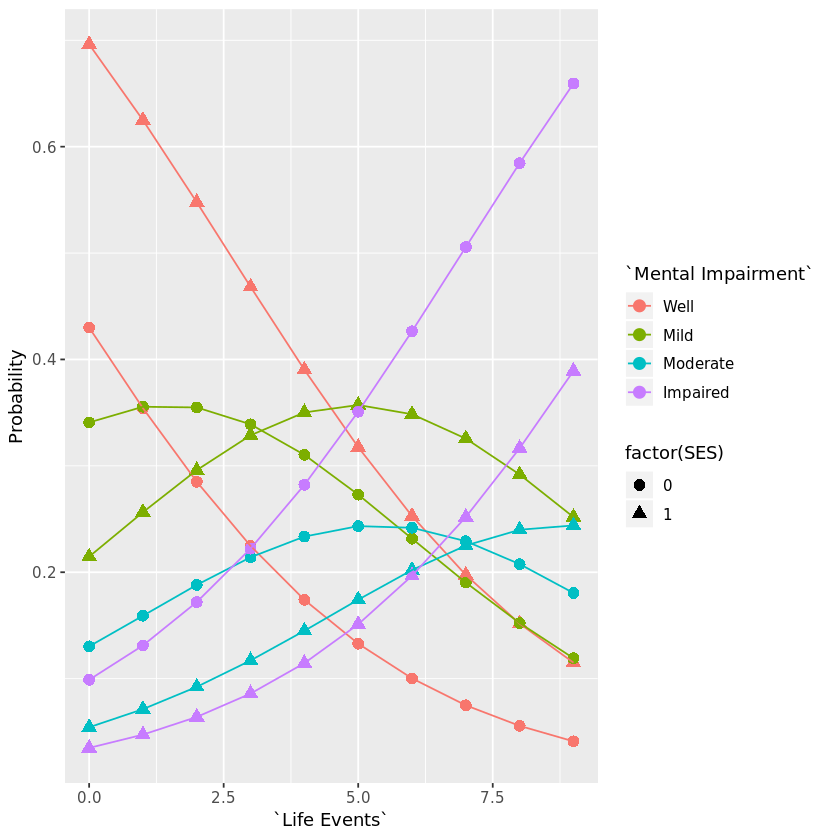

In [66]:
ggplot(probabilities, aes(x=`Life Events`, y=Probability, color=`Mental Impairment`)) +
  geom_point(aes(shape=factor(SES)), size=3) +
  geom_line(aes(group=interaction(factor(SES), `Mental Impairment`)))

In [17]:
?melt

In [236]:
model.4$coefficients['`Life Events`']

`Life Events` 
    0.3188613

In [212]:
model.1$zeta

Well|Mild     Mild|Moderate Moderate|Impaired 
       -0.8472977         0.4054527         1.2367503

In [50]:
predict(model.4, data.frame(`SES`=1, `Life Events`=1, check.names=FALSE), type='probs', interval='confidence')

Well       Mild   Moderate   Impaired 
0.62491585 0.25642217 0.07131474 0.04734725

In [52]:
predict(model.4, mental.impairment)

[1] Well     Impaired Well     Well     Mild     Well     Mild     Well    
 [9] Well     Mild     Mild     Mild     Mild     Impaired Well     Mild    
[17] Impaired Well     Impaired Mild     Impaired Mild     Well     Well    
[25] Well     Well     Mild     Impaired Mild     Mild     Mild     Impaired
[33] Well     Mild     Impaired Mild     Mild     Impaired Impaired Impaired
Levels: Well Mild Moderate Impaired

In [55]:
predict(model.4, mental.impairment, type='probs')

,Well,Mild,Moderate,Impaired
1,0.62491585,0.2564222,0.07131474,0.04734725
2,0.11502358,0.2518325,0.24398557,0.38915837
3,0.39028430,0.3502175,0.14495563,0.11454256
4,0.46822886,0.3287373,0.11707594,0.08595788
5,0.28503416,0.3548980,0.18808642,0.17198137
6,0.69621280,0.2146344,0.05428168,0.03487110
7,0.35416883,0.3555319,0.15911298,0.13118624
8,0.46822886,0.3287373,0.11707594,0.08595788
9,0.46822886,0.3287373,0.11707594,0.08595788
10,0.19738781,0.3255946,0.22513070,0.25188691


In [251]:


#2*(log.likelihood(model.4, mental.impairment) - log.likelihood(model.3, mental.impairment))
mental.impairment[,c(Count=length(Subject)),by=c('SES','Mental Impairment')]

SES,Mental Impairment,V1
1,Well,8
0,Well,4
1,Mild,8
0,Mild,4
0,Moderate,5
1,Moderate,2
1,Impaired,4
0,Impaired,5


In [240]:
pchisq(9.94415646919008, df=2, lower.tail=FALSE)

[1] 0.006928734

In [242]:
pchisq(7.77645694350367, df=1, lower.tail=FALSE)

[1] 0.005293151

In [246]:
pchisq(6.51497695475754, df=1, lower.tail=FALSE)

[1] 0.01069697

In [248]:
pchisq(3.42917951443253, df=1, lower.tail=FALSE)

[1] 0.06405392

In [244]:
pchisq(2.1676995256864, df=1, lower.tail=FALSE)

[1] 0.1409369

In [144]:
model.2$deviance - model.4$deviance

[1] 7.776457

In [ ]:
model

In [128]:
model.4$deviance

[1] 99.0979

In [36]:
1/(1+exp(-(-0.2819031 - -1.1112310 - 0.3188613)))

[1] 0.6249159

In [38]:
1/(1+exp(-(1.2127926 - -1.1112310 - 0.3188613)))

[1] 0.881338

In [39]:
0.881338021781249 - 0.62491585002927

[1] 0.2564222